# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: The aim of this project is to identify the various factors that influence a student being admitted into college. The factors that we will be considering are the students GPA, GRE and also the ranking of their college (from 1 to 4, 1 been the most prestigious college)

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: Our data consits of the reponse vaiable for admittance which ias a categorical variable with 1 been admitted into university and 0 not admitted to university. Our also data the factors that we will use to study what has the most influence on university and this consists of a students GPA and GRE score that are continuous or numeric variables. The data sets also includes categorical variables (1 to 4) whcih is a rank of each students college with 1 been most prestigious and 4 been the least prestigious. 

The total data set has 400 entries however, 3 students had information missing so as a result given the small % of missing data those students with missing values were ommitted from the analysis. 

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [9]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [20]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
cols_to_keep = ['admit', 'gre', 'gpa']

data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])

data.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [19]:
data.p1 = 1/data["prestige_1.0"].count()
p2 = 1/data["prestige_2.0"].count()

In [15]:
pd.pivot_table(data, columns = 'admit', values  = ['gre', 'gpa', 'p1', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0'], aggfunc={'gre':np.std, 'gpa':np.std, 'prestige_1.0':sum, 'prestige_2.0':sum, 'prestige_3.0':sum, 'prestige_4.0':sum})

admit,0,1
gpa,0.376355,0.371655
gre,116.052798,109.257233
prestige_1.0,28.000000,33.000000
prestige_2.0,95.000000,53.000000
prestige_3.0,93.000000,28.000000
prestige_4.0,55.000000,12.000000


Answer:

### Results: Write up your results

Answer:A logistic model was used to determine the odds of a student been accepted to university. Assuming that the reference rank of the college attended by a student is #1, based on the odds ratio from our logistic model we find that the for every unit increase in GPA, the odds of a student getting into university would double.

We also find that if we hold GPA and GRE equal, the probability or the odds of being admitted into university is much higher if you attended a college that was ranked #1 in prestige. From the graphs below and the results from our regression, compared to a student who attended a #1 ranked college, we can see that if a student attended a college that was ranked #2 in terms of prestige their chances of being admitted would decrease by almost 1.96 times, if ranked #3 then chances would decrease by 3.8 times and for students attending a college ranked #4 their odds of being admitted would decrease by 4.7 times.  

### Visuals: Provide a table or visualization of these results

# Regression results

<img src='placeholder.png' height= 25% width= 25%>

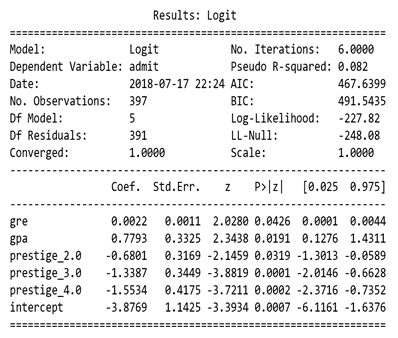

# Odds and Confidence interval

 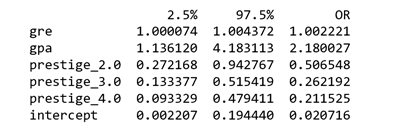

<img src='placeholder.png' height= 25% width= 25%>

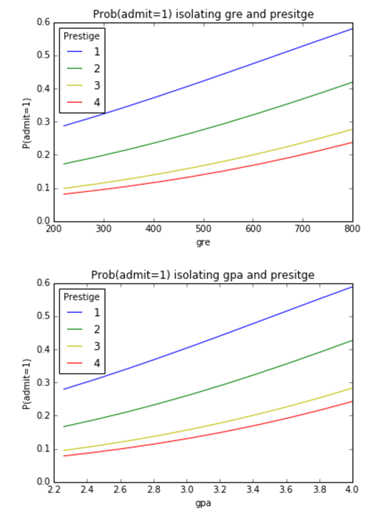

### Discussion: Write up your discussion and future steps

Answer: Next steps would be to tune the model via cross validation and using grid search to measure the performance of our model and see if we can improve model output. We should also split the data up between training and testing, and use the training data to train the model and see how generalisable our model is by using it to predict the our testing data and see how accurate the model actually is. 

I would also like to start looking at fitting other models such as decision trees or random forests to see if those models would provide better results. 